In [5]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import random
# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [6]:
#!pip install citipy

In [7]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

657

In [8]:
#print cities and see names 
cities

['yellowknife',
 'esperance',
 'butaritari',
 'balabac',
 'dhidhdhoo',
 'rawson',
 'dikson',
 'kavieng',
 'kwekwe',
 'mar del plata',
 'bluff',
 'taolanaro',
 'nuuk',
 'busselton',
 'rikitea',
 'hithadhoo',
 'kodiak',
 'arraial do cabo',
 'port alfred',
 'butterworth',
 'bathsheba',
 'san patricio',
 'belushya guba',
 'hobart',
 'klaksvik',
 'puerto ayora',
 'torbay',
 'acheng',
 'obluche',
 'jamsa',
 'punta arenas',
 'sao joao da barra',
 'burnie',
 'katsuura',
 'abu dhabi',
 'talnakh',
 'barabai',
 'east london',
 'bredasdorp',
 'goundam',
 'tuktoyaktuk',
 'carnarvon',
 'vaini',
 'cabo san lucas',
 'nemuro',
 'dwarka',
 'aleksandrov gay',
 'zonguldak',
 'cape town',
 'kavaratti',
 'camacha',
 'haverfordwest',
 'lyuban',
 'ushuaia',
 'atuona',
 'port lincoln',
 'saint-augustin',
 'cockburn harbour',
 'kasempa',
 'saint-philippe',
 'hermanus',
 'surt',
 'jamestown',
 'sinnamary',
 'daru',
 'saskylakh',
 'cherskiy',
 'taoudenni',
 'plymouth',
 'karacakoy',
 'tir pol',
 'albany',
 'deput

In [9]:

#demo api 

# demo api call for one city

# steps to make an api call
# 1. URL: assemble the order (restaurant location, type of order)
# 2. REQUEST: send the order

#               restaurant name                         order configuration  (  password   type of search  )
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key + "&q=" + 'kawalu'
url

'http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ec81b973b4b92a260f455e88cc103bef&q=kawalu'

In [10]:
# send the order, and handle the output
kawalu_weather_output = requests.get(url).json()

kawalu_weather_output

{'coord': {'lon': 108.21, 'lat': -7.38},
 'weather': [{'id': 802,
   'main': 'Clouds',
   'description': 'scattered clouds',
   'icon': '03d'}],
 'base': 'stations',
 'main': {'temp': 79.06,
  'pressure': 1015.57,
  'humidity': 58,
  'temp_min': 79.06,
  'temp_max': 79.06,
  'sea_level': 1015.57,
  'grnd_level': 948.09},
 'wind': {'speed': 6.55, 'deg': 99.182},
 'clouds': {'all': 37},
 'dt': 1565837557,
 'sys': {'message': 0.0059,
  'country': 'ID',
  'sunrise': 1565823358,
  'sunset': 1565866069},
 'timezone': 25200,
 'id': 1640902,
 'name': 'Kawalu',
 'cod': 200}

In [11]:
#retrieve the data you want from all cities first using one city to see if it worked 

city_dictionary = {
    'name': kawalu_weather_output['name'],
    'temperature': kawalu_weather_output['main']['temp'],
    'humidity': kawalu_weather_output['main']['humidity'],
    'cloudiness': kawalu_weather_output['clouds']['all'],
    'wind speed': kawalu_weather_output['wind']['speed'],
    'lat': kawalu_weather_output['coord']['lat'],
    'lon': kawalu_weather_output['coord']['lon']
}

city_dictionary

{'name': 'Kawalu',
 'temperature': 79.06,
 'humidity': 58,
 'cloudiness': 37,
 'wind speed': 6.55,
 'lat': -7.38,
 'lon': 108.21}

In [12]:

# For loop and make a bunch of different city dictionaries

# create an empty list that we can add each city dictionary to
city_dictionaries1 = []


counter = 1
# for loop
for city in cities: # going through the list of cities and performing an api call for each city
    print(counter)
    counter += 1
    
    # attempt to do something, otherwise if there is a problem go to the `except` area
    try:
        # make the order for each different city
        url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key + "&q=" + city

        # send the order, and handle the output
        city_weather_output = requests.get(url).json()
  # check to see if the data is good
        # create our custom dictionary (will represent a row in a dataframe)
        city_dictionary = {
            'name': city_weather_output['name'],
            'temperature': city_weather_output['main']['temp'],
            'humidity': city_weather_output['main']['humidity'],
            'cloudiness': city_weather_output['clouds']['all'],
            'wind speed': city_weather_output['wind']['speed'],
            'lat': city_weather_output['coord']['lat'],
            'lon': city_weather_output['coord']['lon']
        }

        # add to city_dictionaries list
        city_dictionaries1.append(city_dictionary)
        
    except:
        print(f'Something goofed with the api call with city: {city}')

1
2
3
4
5
6
7
8
9
10
11
12
Something goofed with the api call with city: taolanaro
13
14
15
16
17
18
19
20
21
22
23
Something goofed with the api call with city: belushya guba
24
25
26
27
28
29
Something goofed with the api call with city: obluche
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
Something goofed with the api call with city: cockburn harbour
59
60
61
62
63
64
65
66
67
68
69
70
71
Something goofed with the api call with city: tir pol
72
73
74
75
76
77
78
79
Something goofed with the api call with city: nguiu
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
Something goofed with the api call with city: vaitupu
96
Something goofed with the api call with city: barentsburg
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
Something goofed with the api call with city: illoqqortoormiut
112
113
114
115
116
117
118
Something goofed with the api call with city: amderma
119
Something goofed with the api call with city: haibowan
120
121
1

In [14]:
city_dictionaries1 #gives us cities with all the information needed for our dataframes

[{'name': 'Yellowknife',
  'temperature': 60.8,
  'humidity': 82,
  'cloudiness': 75,
  'wind speed': 3.36,
  'lat': 62.45,
  'lon': -114.38},
 {'name': 'Esperance',
  'temperature': 53.6,
  'humidity': 76,
  'cloudiness': 90,
  'wind speed': 14.99,
  'lat': -33.86,
  'lon': 121.89},
 {'name': 'Butaritari',
  'temperature': 84.64,
  'humidity': 71,
  'cloudiness': 100,
  'wind speed': 10.16,
  'lat': 3.07,
  'lon': 172.79},
 {'name': 'Balabac',
  'temperature': 87.34,
  'humidity': 62,
  'cloudiness': 100,
  'wind speed': 6.24,
  'lat': 7.99,
  'lon': 117.06},
 {'name': 'Dhidhdhoo',
  'temperature': 82.84,
  'humidity': 78,
  'cloudiness': 99,
  'wind speed': 12.46,
  'lat': 6.88,
  'lon': 73.1},
 {'name': 'Rawson',
  'temperature': 39.28,
  'humidity': 81,
  'cloudiness': 26,
  'wind speed': 19.93,
  'lat': -43.3,
  'lon': -65.11},
 {'name': 'Dikson',
  'temperature': 44.86,
  'humidity': 93,
  'cloudiness': 100,
  'wind speed': 20.67,
  'lat': 73.51,
  'lon': 80.55},
 {'name': 'Kavie

In [15]:
# city_dictionaries=city_dictionaries()
# city_dictionaries.to_csv("../Resporces/weatherpy_data.csv")
# city_dictionaries.count(axis = 0)
city_dictionaries=pd.DataFrame()



city_dictionaries = pd.DataFrame(city_dictionaries1)
# # city_dictionaries.to_csv('results.csv', index=False, header=False)


city_dictionaries.to_csv("weatherpy_data.csv")
city_dictionaries.count(axis = 0)
city_dictionaries.info()

# pd.dataframe thead th {
#     text-align: left;
# }

# pd.dataframe tbody tr th {
#     vertical-align: top;
# }
city_dictionaries=city_dictionaries[['name','temperature','wind speed','cloudiness','humidity','lat','lon']]
# city_dictionaries['name']
city_dictionaries

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 591 entries, 0 to 590
Data columns (total 7 columns):
cloudiness     591 non-null int64
humidity       591 non-null int64
lat            591 non-null float64
lon            591 non-null float64
name           591 non-null object
temperature    591 non-null float64
wind speed     591 non-null float64
dtypes: float64(4), int64(2), object(1)
memory usage: 32.4+ KB


name  temperature  wind speed  cloudiness  humidity    lat  \
0           Yellowknife        60.80        3.36          75        82  62.45   
1             Esperance        53.60       14.99          90        76 -33.86   
2            Butaritari        84.64       10.16         100        71   3.07   
3               Balabac        87.34        6.24         100        62   7.99   
4             Dhidhdhoo        82.84       12.46          99        78   6.88   
5                Rawson        39.28       19.93          26        81 -43.30   
6                Dikson        44.86       20.67         100        93  73.51   
7               Kavieng        83.20       11.10           0        72  -2.57   
8                Kwekwe        49.90        6.46           0        63 -18.93   
9         Mar del Plata        31.90        4.72           0        60 -46.43   
10                Bluff        73.66       12.08          23        39 -23.58   
11                 Nuuk        42.80        4.70           0        93  64.17   
12            Busselton        60.51       10.27          86        71 -33.64   
13              Rikitea        74.02       12.66          11        86 -23.12   
14            Hithadhoo        82.48        6.64          88        73  -0.60   
15               Kodiak        66.90        6.93           1        82  39.95   
16      Arraial do Cabo        66.46       11.99         100        72 -22.97   
17          Port Alfred        55.99        3.00           0        90 -33.59   
18          Butterworth        77.45       10.29          75       100   5.40   
19            Bathsheba        82.40       23.04          40        78  13.22   
20         San Patricio        43.60        5.48          33        90 -26.98   
21               Hobart        62.38       19.46          40        38 -42.88   
22             Klaksvik        48.20        5.82          95        93  62.23   
23         Puerto Ayora        68.00        3.00          92        94  -0.74   
24               Torbay        58.80       13.87          20        77  47.66   
25               Acheng        73.40        8.95          40        94  45.55   
26                Jamsa        50.88        3.36          75        93  61.86   
27         Punta Arenas        30.11       12.75           0        86 -53.16   
28    Sao Joao da Barra        63.22        5.57          85        70 -21.64   
29               Burnie        54.00        5.99         100        63 -41.05   
..                  ...          ...         ...         ...       ...    ...   
561           Tocopilla        56.92        3.62          44        85 -22.09   
562              Kanash        59.00        4.47          75        93  55.51   
563          Sao Filipe        74.92       16.55           0        85  14.90   
564              Takaka        57.22        4.00           1        62 -40.86   
565          Libreville        77.00       10.29          20        78   0.39   
566          Port Hardy        68.00       11.41          20        60  50.70   
567           Nantucket        65.39        9.17          90        93  41.28   
568  Havre-Saint-Pierre        53.60        5.82          20        93  50.23   
569             Aksarka        58.36        4.92          99        87  66.56   
570           Nanticoke        66.25        3.80           1        88  41.21   
571     Puerto Ayacucho        77.00        2.77          75        94   5.66   
572              Kijang        82.40       13.87          90        83  35.24   
573             Suffolk        76.66        3.33          40        88  36.73   
574             Kendari        83.02        4.41          63        58  -3.99   
575      Vestmannaeyjar        49.00        8.39          90        78  63.44   
576             Isangel        77.00        5.82          75        73 -19.55   
577              Ofaqim        71.76        1.01           0        86  31.31   
578          Portlethen        56.01        8.05  

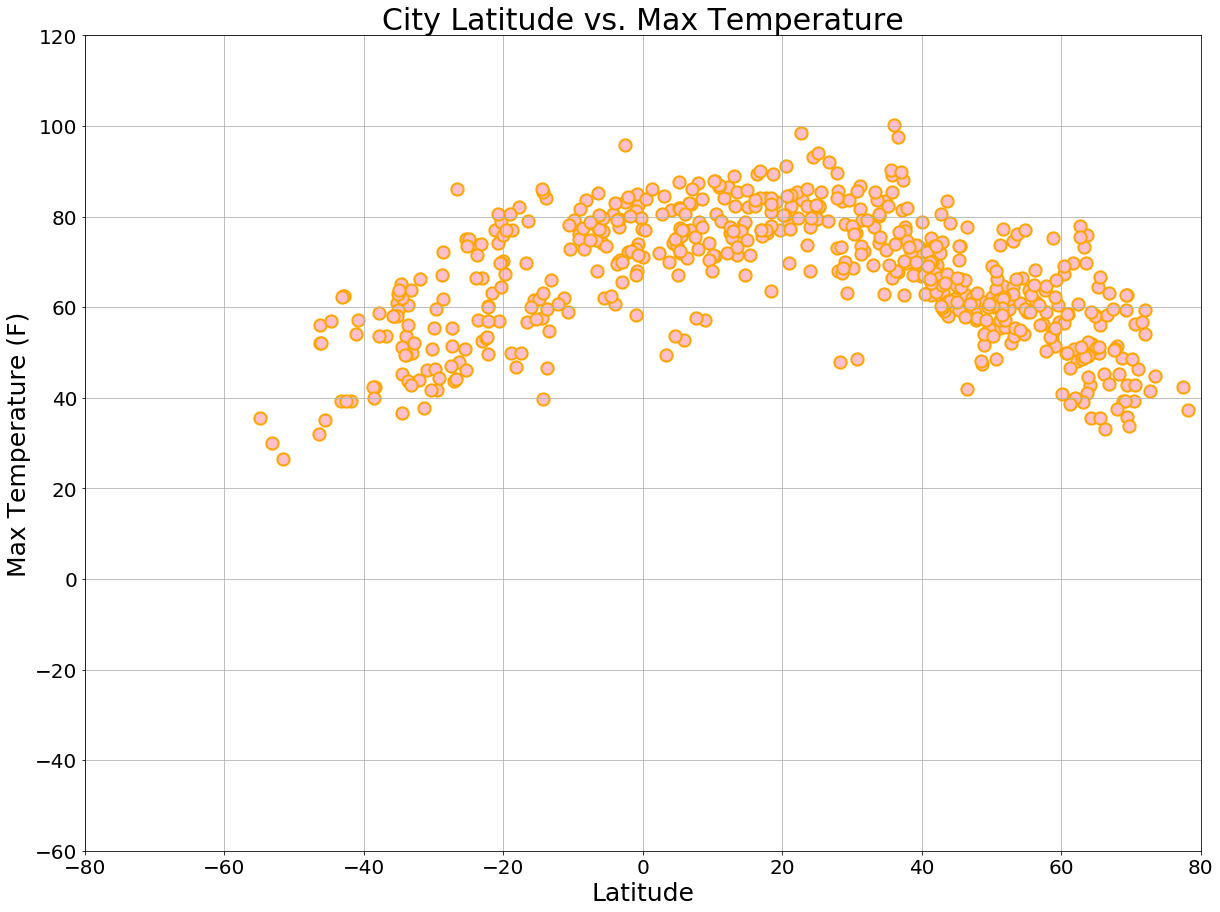

<Figure size 432x288 with 0 Axes>

In [16]:
city_dictionaries.plot(kind="scatter", x="lat", y="temperature",
                    grid=True, color="pink", edgecolor = "orange", s =150, linewidth = 2, 
                    figsize =(20, 15))
plt.title('City Latitude vs. Max Temperature', fontsize = 30)
plt.ylabel('Max Temperature (F)',  fontsize = 25)
plt.xlabel('Latitude', fontsize = 25)
plt.grid(True)
plt.xlim(-80, 80)
plt.ylim(-60, 120)
plt.tick_params(labelsize=20)
plt.show()
plt.savefig('latitude_temp')

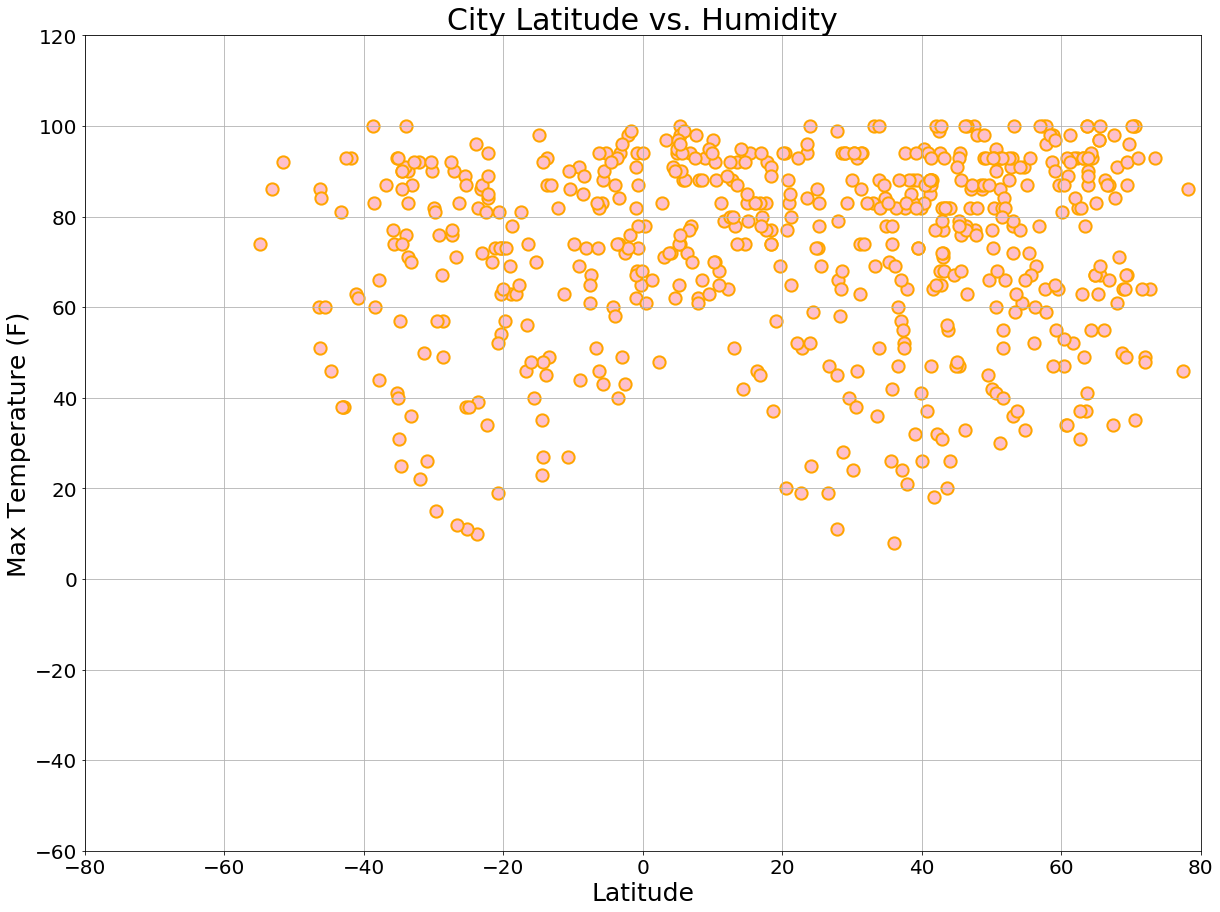

<Figure size 432x288 with 0 Axes>

In [17]:
city_dictionaries.plot(kind="scatter", x="lat", y="humidity",
                    grid=True, color="pink", edgecolor = "orange", s =150, linewidth = 2, 
                    figsize =(20, 15))
plt.title('City Latitude vs. Humidity', fontsize = 30)
plt.ylabel('Max Temperature (F)',  fontsize = 25)
plt.xlabel('Latitude', fontsize = 25)
plt.grid(True)
plt.xlim(-80, 80)
plt.ylim(-60, 120)
plt.tick_params(labelsize=20)
plt.show()
plt.savefig('latitude_temp')

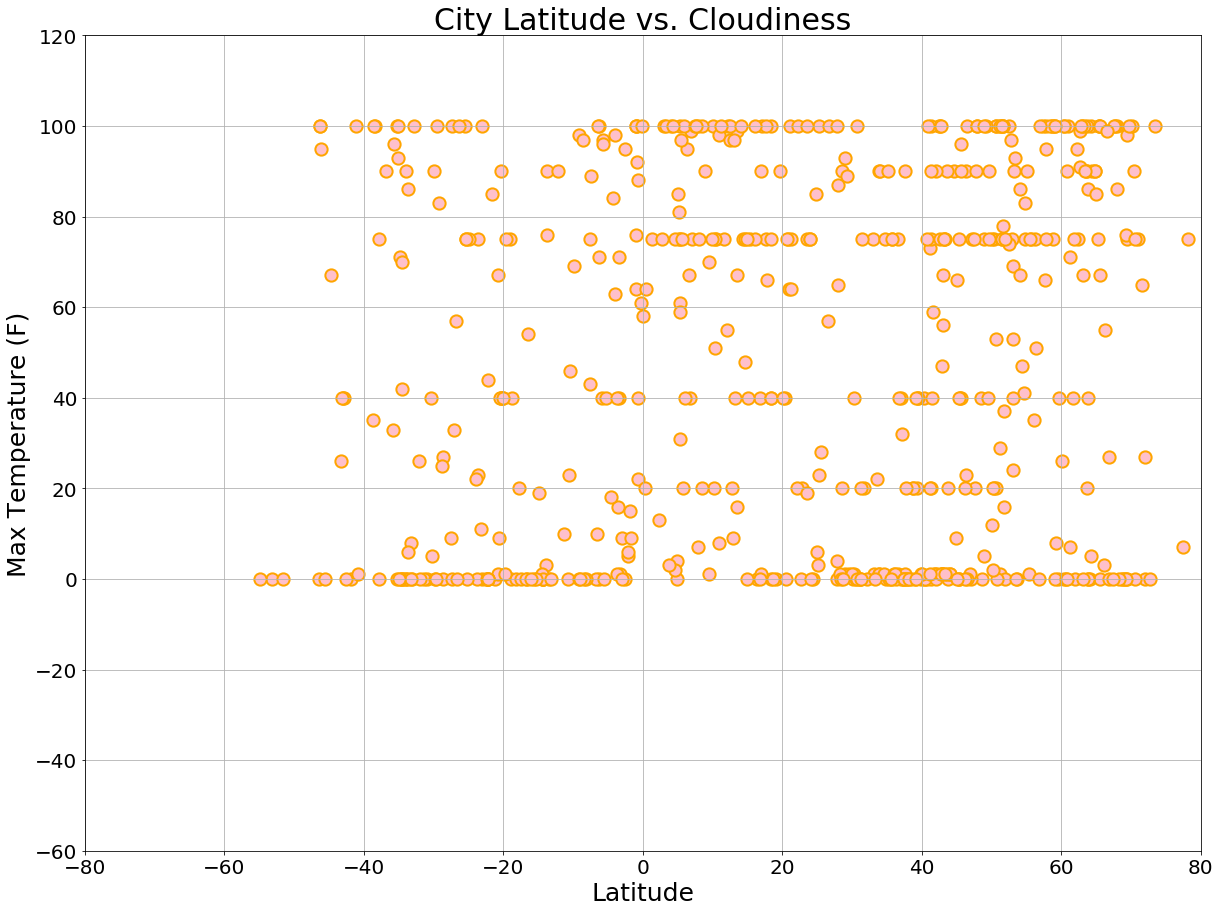

<Figure size 432x288 with 0 Axes>

In [18]:
city_dictionaries.plot(kind="scatter", x="lat", y="cloudiness",
                    grid=True, color="pink", edgecolor = "orange", s =150, linewidth = 2, 
                    figsize =(20, 15))
plt.title('City Latitude vs. Cloudiness', fontsize = 30)
plt.ylabel('Max Temperature (F)',  fontsize = 25)
plt.xlabel('Latitude', fontsize = 25)
plt.grid(True)
plt.xlim(-80, 80)
plt.ylim(-60, 120)
plt.tick_params(labelsize=20)
plt.show()
plt.savefig('latitude_temp')

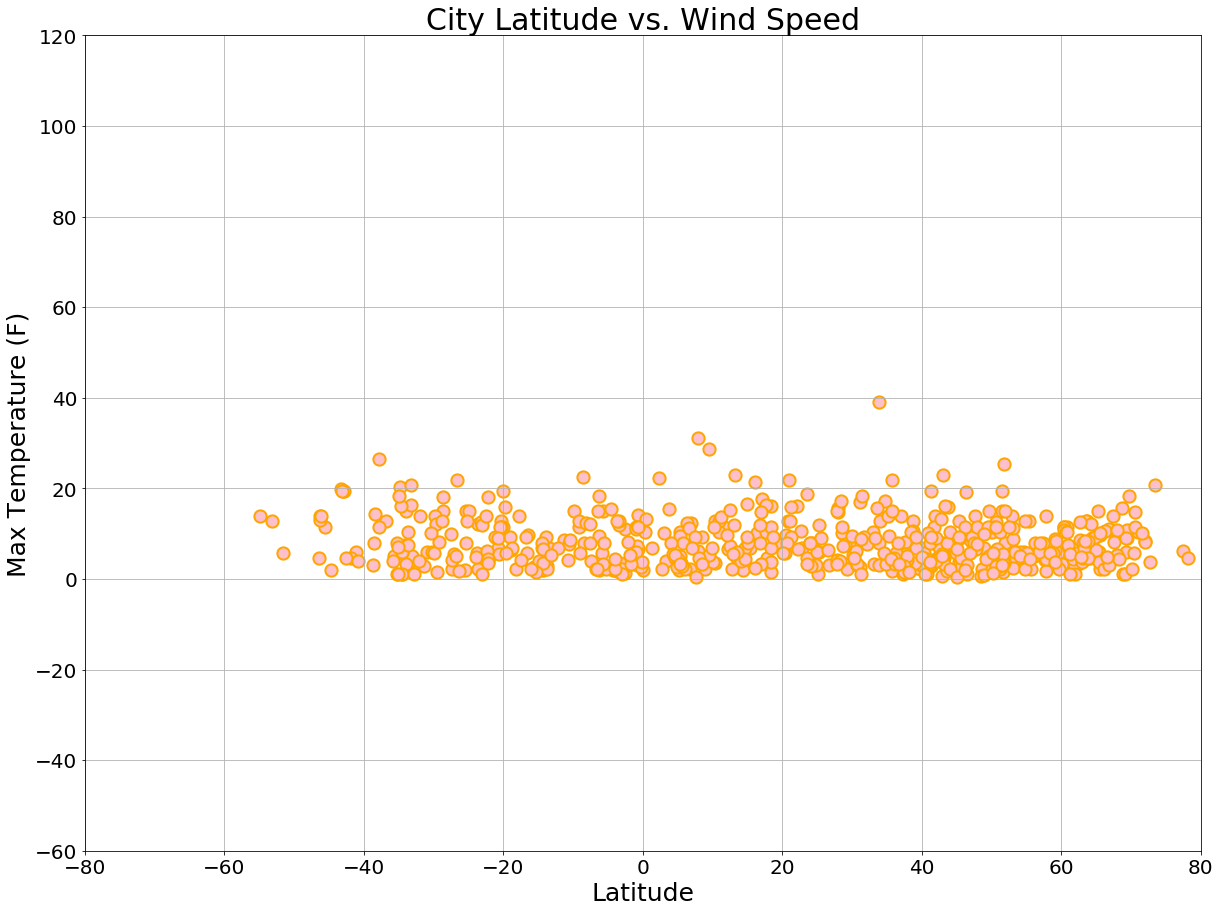

<Figure size 432x288 with 0 Axes>

In [19]:
city_dictionaries.plot(kind="scatter", x="lat", y="wind speed",
                    grid=True, color="pink", edgecolor = "orange", s =150, linewidth = 2, 
                    figsize =(20, 15))
plt.title('City Latitude vs. Wind Speed', fontsize = 30)
plt.ylabel('Max Temperature (F)',  fontsize = 25)
plt.xlabel('Latitude', fontsize = 25)
plt.grid(True)
plt.xlim(-80, 80)
plt.ylim(-60, 120)
plt.tick_params(labelsize=20)
plt.show()
plt.savefig('latitude_temp')